<a href="https://colab.research.google.com/github/punyamsingh/IRIS/blob/Colab/IR_TAG_WITH_IMAGE_DISPLAY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
! pip install pillow ipython


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 23.3 MB/s eta 0:00:00


In [14]:
! pip install ftfy regex tqdm
! pip install git+https://github.com/openai/CLIP.git
! pip install torch torchvision
! pip install yolov5
! pip install torch torchvision transformers sentence-transformers nltk
! pip install pillow



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 2.2 MB/s eta 0:00:00
  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-o60kvn9e
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-o60kvn9e
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py) ... done
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369489 sha256=7bd4e8f0d7ec8d6e96e503c6452df9bea8f7bd5621b6e7fa3bca3acfeabc21e5
  Stored in directory: /tmp/pip-ephem-wheel-cache-i76p3c1r/wheels/da/2b/4c/d6691fa9597aac8bb85d2ac13b112deb897d5b50f5ad9a37e4
Successfully built clip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.5/953.5 kB 30.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━

In [1]:
import torch
from PIL import Image
from transformers import BlipProcessor, BlipForConditionalGeneration
import os
import json
import spacy
from nltk.corpus import stopwords


In [2]:
import torch
from PIL import Image
from transformers import BlipProcessor, BlipForConditionalGeneration
import os
import json

# Load the pre-trained BLIP model and processor
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-large")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-large")

def get_image_tags(image_path):
    """Use BLIP to generate detailed captions for the image."""
    image = Image.open(image_path).convert("RGB")

    # Preprocess the image
    pixel_values = processor(images=image, return_tensors="pt").pixel_values

    # Generate a more detailed caption with increased max_length and beam search
    output_ids = model.generate(pixel_values, max_length=100, num_beams=5, early_stopping=True)[0]
    caption = processor.decode(output_ids, skip_special_tokens=True)

    # Extract tags (split caption into words or use NLP techniques to extract key objects)
    tags = set(caption.lower().split())

    return list(tags)

def process_directory(directory_path, output_file='image_tags.json'):
    """Process all images in a directory, generate tags using BLIP, and save to JSON file."""
    image_tags_mapping = {}

    for filename in os.listdir(directory_path):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_path = os.path.join(directory_path, filename)
            # Step 1: Get detailed tags from the image using BLIP
            tags = get_image_tags(image_path)
            # Step 2: Store the mapping
            image_tags_mapping[filename] = tags
            print(f"Processed {filename} with tags: {tags}")

    # Save the image-to-tags mapping to a JSON file
    with open(output_file, 'w') as f:
        json.dump(image_tags_mapping, f, indent=4)


process_directory('/content')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/445 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/527 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


config.json:   0%|          | 0.00/4.60k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.88G [00:00<?, ?B/s]

Processed IMG_9332.JPG with tags: ['a', 'standing', 'is', 'man', 'in', 'talking', 'on', 'there', 'the', 'grass', 'phone', 'that']
Processed IMG_9413.JPG with tags: ['a', 'next', 'tree', 'is', 'man', 'in', 'to', 'there', 'standing', 'park']
Processed IMG_9343.JPG with tags: ['sign', 'pole', 'a', 'front', 'of', 'is', 'on', 'there', 'in', 'building', 'stop']
Processed IMG_9335.JPG with tags: ['front', 'a', 'of', 'is', 'man', 'bulldozer', 'on', 'there', 'the', 'sitting', 'grass', 'in']
Processed IMG_9889.JPG with tags: ['front', 'a', 'of', 'is', 'man', 'in', 'wall', 'there', 'the', 'dark', 'standing']
Processed IMG_9466.JPG with tags: ['a', 'is', 'man', 'there', 'the', 'bike', 'that', 'street', 'riding', 'down']
Processed IMG_9441.JPG with tags: ['that', 'standing', 'in', 'there', 'are', 'the', 'grass', 'white', 'many', 'birds']
Processed IMG_9328.JPG with tags: ['flower', 'a', 'tree', 'of', 'bed', 'is', 'in', 'there', 'the', 'middle', 'small', 'that']
Processed IMG_9329.JPG with tags: ['a

Biased score with 0.5 weight to literal similarity and 0.5 weight to semantic similarity

In [10]:
import os
import json
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sentence_transformers import SentenceTransformer
from scipy.spatial.distance import cosine

#THRESHOLD REMAINING


# Load the image tags from the JSON file
with open('image_tags.json', 'r') as f:
    image_tags_mapping = json.load(f)

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Initialize the Sentence Transformer model for semantic similarity
st_model = SentenceTransformer('all-mpnet-base-v2')

def get_literal_similarity(query, image_tags):
    """Calculate literal similarity between the query and image tags using TF-IDF."""
    # Combine all tags into a single document
    all_tags = ' '.join(image_tags)

    # Fit the TF-IDF vectorizer and transform the query and tags
    X = tfidf_vectorizer.fit_transform([query, all_tags])

    # Calculate the cosine similarity between the query and tags
    literal_sim = 1 - cosine(X[0].toarray().flatten(), X[1].toarray().flatten())
    return literal_sim

def get_semantic_similarity(query, image_tags):
    """Calculate semantic similarity between the query and image tags using Sentence Transformer."""
    # Encode the query and tags
    query_embed = st_model.encode(query)
    tags_embed = st_model.encode(image_tags)

    # Calculate the mean of the tag embeddings
    tags_mean_embed = np.mean(tags_embed, axis=0)

    # Calculate the cosine similarity between the query and tag embeddings
    semantic_sim = 1 - cosine(query_embed, tags_mean_embed)
    return semantic_sim

def rank_images(query):
    """Rank images based on literal and semantic similarity to the query and print scores."""
    # Calculate literal and semantic similarity for each image
    similarity_scores = []
    for filename, tags in image_tags_mapping.items():
        literal_sim = get_literal_similarity(query, tags)
        semantic_sim = get_semantic_similarity(query, tags)
        similarity_scores.append((filename, literal_sim, semantic_sim))

    # Sort the images based on the combined similarity score
    #Here we can give more weight to semantic or more weight to literal we can experiment on that
    similarity_scores.sort(key=lambda x: 0.5 * x[1] + 0.5 * x[2], reverse=True)

    # Print the scores along with filenames
    for filename, literal_sim, semantic_sim in similarity_scores:
        print(f"Image: {filename}, Literal Similarity: {literal_sim:.4f}, Semantic Similarity: {semantic_sim:.4f}")

    return [filename for filename, _, _ in similarity_scores]

# Example usage
query = "Man standing next to tree"
ranked_images = rank_images(query)


Image: IMG_9413.JPG, Literal Similarity: 0.6225, Semantic Similarity: 0.2677
Image: IMG_9889.JPG, Literal Similarity: 0.1684, Semantic Similarity: 0.1270
Image: IMG_9476.jpg, Literal Similarity: 0.1684, Semantic Similarity: 0.1270
Image: IMG_9332.JPG, Literal Similarity: 0.1597, Semantic Similarity: 0.1229
Image: IMG_9412.JPG, Literal Similarity: 0.0773, Semantic Similarity: 0.1474
Image: IMG_9327.JPG, Literal Similarity: 0.0736, Semantic Similarity: 0.1111
Image: IMG_9328.JPG, Literal Similarity: 0.0736, Semantic Similarity: 0.1011
Image: IMG_9441.JPG, Literal Similarity: 0.0773, Semantic Similarity: 0.0966
Image: IMG_9342.JPG, Literal Similarity: 0.0773, Semantic Similarity: 0.0904
Image: IMG_9329.JPG, Literal Similarity: 0.0736, Semantic Similarity: 0.0810
Image: IMG_9337.JPG, Literal Similarity: 0.0736, Semantic Similarity: 0.0782
Image: IMG_9333.JPG, Literal Similarity: 0.0736, Semantic Similarity: 0.0735
Image: IMG_9330.JPG, Literal Similarity: 0.0736, Semantic Similarity: 0.0735

SUM WEIGHTED SCORE

In [13]:
import os
import json
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sentence_transformers import SentenceTransformer
from scipy.spatial.distance import cosine

# Load the image tags from the JSON file
with open('image_tags.json', 'r') as f:
    image_tags_mapping = json.load(f)

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Initialize the Sentence Transformer model for semantic similarity
st_model = SentenceTransformer('all-mpnet-base-v2')

def get_literal_similarity(query, image_tags):
    """Calculate literal similarity between the query and image tags using TF-IDF."""
    # Combine all tags into a single document
    all_tags = ' '.join(image_tags)

    # Fit the TF-IDF vectorizer and transform the query and tags
    X = tfidf_vectorizer.fit_transform([query, all_tags])

    # Calculate the cosine similarity between the query and tags
    literal_sim = 1 - cosine(X[0].toarray().flatten(), X[1].toarray().flatten())
    return literal_sim

def get_semantic_similarity(query, image_tags):
    """Calculate semantic similarity between the query and image tags using Sentence Transformer."""
    # Encode the query and tags
    query_embed = st_model.encode(query)
    tags_embed = st_model.encode(image_tags)

    # Calculate the mean of the tag embeddings
    tags_mean_embed = np.mean(tags_embed, axis=0)

    # Calculate the cosine similarity between the query and tag embeddings
    semantic_sim = 1 - cosine(query_embed, tags_mean_embed)
    return semantic_sim

def rank_images(query):
    """Rank images based on the sum of literal and semantic similarity scores to the query and print scores."""
    # Calculate literal and semantic similarity for each image
    similarity_scores = []
    for filename, tags in image_tags_mapping.items():
        literal_sim = get_literal_similarity(query, tags)
        semantic_sim = get_semantic_similarity(query, tags)
        total_score = literal_sim + semantic_sim

        # Filter out images with a combined similarity score below 0.2
        if total_score >= 0.2:
            similarity_scores.append((filename, literal_sim, semantic_sim, total_score))

    # Sort the images based on the sum of the literal and semantic similarity scores
    similarity_scores.sort(key=lambda x: x[3], reverse=True)

    # Print the scores along with filenames
    for filename, literal_sim, semantic_sim, total_score in similarity_scores:
        print(f"Image: {filename}, Literal Similarity: {literal_sim:.4f}, Semantic Similarity: {semantic_sim:.4f}, Total Score: {total_score:.4f}")

    return [filename for filename, _, _, _ in similarity_scores]

# Example usage
query = "Trees"
ranked_images = rank_images(query)


Image: IMG_9352.JPG, Literal Similarity: 0.2308, Semantic Similarity: 0.4919, Total Score: 0.7226
Image: IMG_9327.JPG, Literal Similarity: 0.0000, Semantic Similarity: 0.4798, Total Score: 0.4798
Image: IMG_9441.JPG, Literal Similarity: 0.0000, Semantic Similarity: 0.4539, Total Score: 0.4539
Image: IMG_9412.JPG, Literal Similarity: 0.0000, Semantic Similarity: 0.4476, Total Score: 0.4476
Image: IMG_9413.JPG, Literal Similarity: 0.0000, Semantic Similarity: 0.4412, Total Score: 0.4412
Image: IMG_9328.JPG, Literal Similarity: 0.0000, Semantic Similarity: 0.4107, Total Score: 0.4107
Image: IMG_9334.JPG, Literal Similarity: 0.0000, Semantic Similarity: 0.4089, Total Score: 0.4089
Image: IMG_9329.JPG, Literal Similarity: 0.0000, Semantic Similarity: 0.3941, Total Score: 0.3941
Image: IMG_9341.JPG, Literal Similarity: 0.0000, Semantic Similarity: 0.3921, Total Score: 0.3921
Image: IMG_9333.JPG, Literal Similarity: 0.0000, Semantic Similarity: 0.3844, Total Score: 0.3844
Image: IMG_9342.JPG,

CODE TO DISPLAY IMAGES AND SIMILARITY SUM SCORE


Image: IMG_9332.JPG, Literal Similarity: 0.3102, Semantic Similarity: 0.1906, Total Score: 0.5008


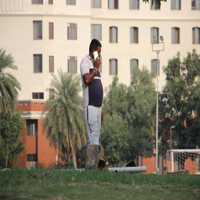


Image: IMG_9333.JPG, Literal Similarity: 0.1844, Semantic Similarity: 0.1433, Total Score: 0.3277


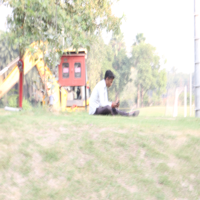

In [24]:
import os
import json
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sentence_transformers import SentenceTransformer
from scipy.spatial.distance import cosine
from PIL import Image
from IPython.display import display

# Load the image tags from the JSON file
with open('image_tags.json', 'r') as f:
    image_tags_mapping = json.load(f)

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Initialize the Sentence Transformer model for semantic similarity
st_model = SentenceTransformer('all-mpnet-base-v2')

def get_literal_similarity(query, image_tags):
    """Calculate literal similarity between the query and image tags using TF-IDF."""
    all_tags = ' '.join(image_tags)
    X = tfidf_vectorizer.fit_transform([query, all_tags])
    literal_sim = 1 - cosine(X[0].toarray().flatten(), X[1].toarray().flatten())
    return literal_sim

def get_semantic_similarity(query, image_tags):
    """Calculate semantic similarity between the query and image tags using Sentence Transformer."""
    query_embed = st_model.encode(query)
    tags_embed = st_model.encode(image_tags)
    tags_mean_embed = np.mean(tags_embed, axis=0)
    semantic_sim = 1 - cosine(query_embed, tags_mean_embed)
    return semantic_sim

def rank_images(query, display_size=(200, 200), threshold=0.2):
    """Rank images based on the sum of literal and semantic similarity scores to the query and display resized images in Jupyter Notebook."""
    similarity_scores = []
    for filename, tags in image_tags_mapping.items():
        literal_sim = get_literal_similarity(query, tags)
        semantic_sim = get_semantic_similarity(query, tags)
        total_score = literal_sim + semantic_sim
        if total_score >= threshold:
            similarity_scores.append((filename, literal_sim, semantic_sim, total_score))

    # Sort images based on the combined score
    similarity_scores.sort(key=lambda x: x[3], reverse=True)

    # Display the scores and resized images in Jupyter Notebook
    for filename, literal_sim, semantic_sim, total_score in similarity_scores:
        print(f"\nImage: {filename}, Literal Similarity: {literal_sim:.4f}, Semantic Similarity: {semantic_sim:.4f}, Total Score: {total_score:.4f}")
        image_path = os.path.join("/content", filename)

        # Open and resize the image
        img = Image.open(image_path)
        img_resized = img.resize(display_size)
        display(img_resized)

# Example usage
query = "Man speaking on phone"
rank_images(query, threshold=0.3)  # You can specify a custom threshold
